### Titanic Solution using Logistic Regression
#### Accuracy score - 0.81

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


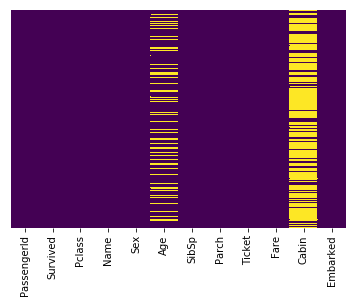

In [5]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

### Visualising Survival Rate of Men and Women acorss all Passenger classses

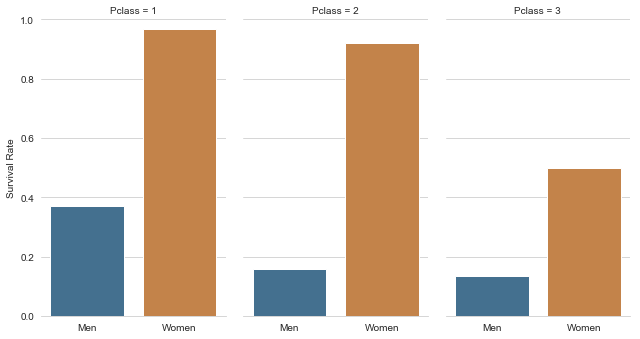

In [7]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                 data=train, saturation=.5,
                 kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women"])
  .set(ylim=(0, 1))
  .despine(left=True))  

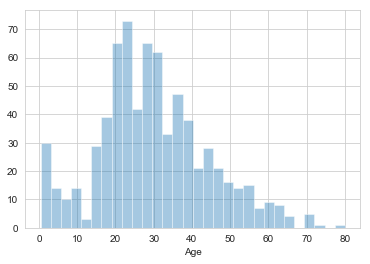

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

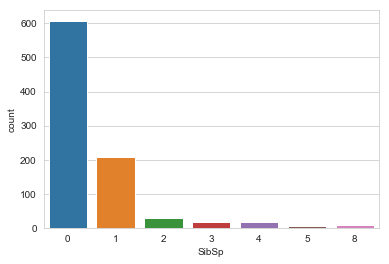

In [9]:
sns.countplot(x='SibSp', data=train)

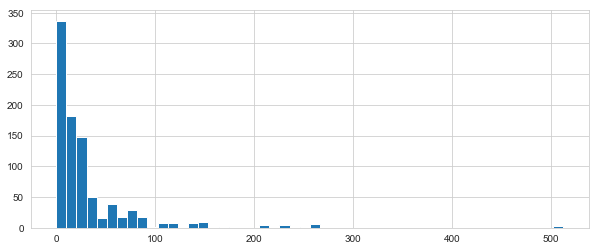

In [10]:
train['Fare'].hist(bins=50, figsize=(10,4))

In [11]:
import cufflinks as cf

In [12]:
cf.go_offline()

In [13]:
train['Fare'].iplot(kind='hist', bins=30)

## Cleaning the data

### 1. Dealing with missing values

As we have noticed that there are a lot of entries with missing age.
We can replace the missing values for a person in a particular Pclass with the average age across that Pclass. 

Getting the average age per class using boxplot: 

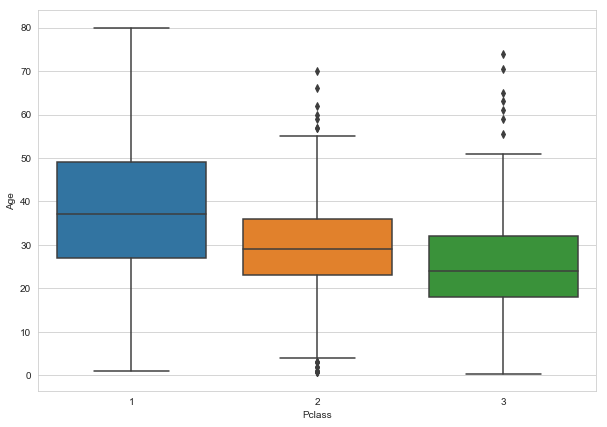

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

**Looking at the boxplot above we can notice that the average Age across wealthier class (1 & 2) tend to be higher that the avg age in lower class 3**

Now lets write a function to impute the null ages with the average age per class: 

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

**Now that we have replaced the Age value with the averages, lets check the heatmap from above to confirm there are no missing Age values**

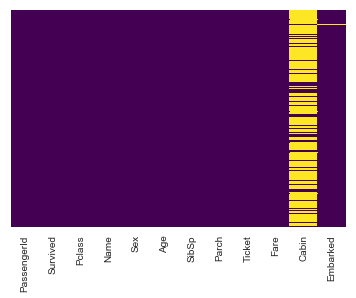

In [17]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Since there are too many missing values for "Cabin" column, we can just go ahead and drop the column

In [18]:
train.drop('Cabin', axis=1, inplace = True)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


And since the embarked column has one missing value, We can drop the row 

In [20]:
train.dropna(inplace=True)

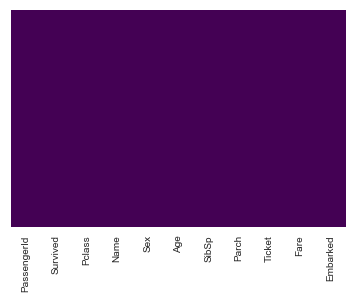

In [21]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### 2. Dealing with Categorical features.

Here I'll be creating dummy variables since for categorical values since the machine learning algorithm wont be able to understand works like male, female etc..

Meaning now we will create separate columns with values 1s & 0s for the columns **"Sex"** & **"Embarked"**

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [23]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
train = pd.concat([train, sex, embark], axis=1)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Next -  Dropping the columns I am not going to use

In [26]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [29]:
#train.drop('PassengerId', axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Training the model

In [30]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [31]:
from sklearn.cross_validation import train_test_split

C:\Users\Syed\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.86       163
          1       0.85      0.65      0.74       104

avg / total       0.82      0.82      0.81       267

